In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Dry_Bean_Dataset.csv')
dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
dataset.shape

(13611, 17)

In [4]:
dataset.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [5]:
dataset = dataset.drop(['Area'],axis=1)

<Axes: xlabel='Class', ylabel='count'>

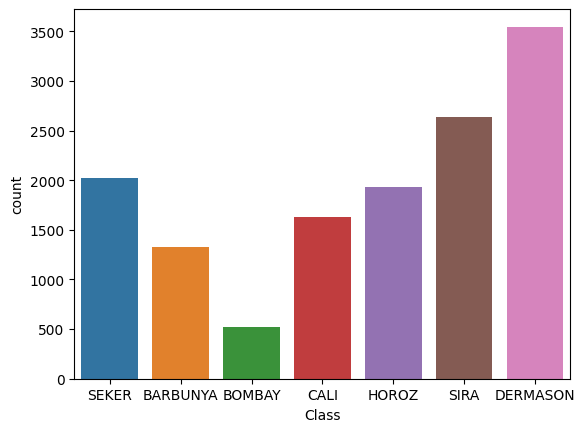

In [6]:
sns.countplot(x = 'Class', data=dataset)
     

In [7]:
X = dataset.iloc[:,0:-1]
y = dataset['Class']

In [8]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.1433189 , -1.30659814, -0.63115304, ...,  2.4021726 ,
         1.92572347,  0.83837102],
       [-1.01392388, -1.39591111, -0.43444458, ...,  3.10089364,
         2.68970162,  0.77113831],
       [-1.07882906, -1.25235661, -0.58573462, ...,  2.23509111,
         1.84135576,  0.91675506],
       ...,
       [-0.44783294, -0.45047814, -0.24645586, ...,  0.28920501,
         0.33632829,  0.39025106],
       [-0.42702856, -0.42897404, -0.26674226, ...,  0.22837456,
         0.2489734 ,  0.03644007],
       [-0.38755718, -0.2917356 , -0.44622403, ..., -0.12777538,
        -0.27648141,  0.71371941]])

In [9]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))
     

In [10]:
samples
     

[(       Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
  10704    618.868       233.001523       151.202562      1.540989   
  13145    738.476       264.960115       182.588263      1.451134   
  2571    1044.470       368.601069       234.202503      1.573856   
  4683    1058.713       405.850888       238.557776      1.701269   
  12624    693.189       254.183543       176.478601      1.440308   
  ...          ...              ...              ...           ...   
  13123    720.476       263.034496       183.384981      1.434330   
  3264    1152.016       417.536420       262.719645      1.589285   
  9845     842.796       316.185621       207.028992      1.527253   
  10799    630.303       239.405409       148.484842      1.612322   
  2732    1037.985       378.651095       237.909773      1.591574   
  
         Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
  10704      0.760845       27753     187.086491  0.731117  0.990524   0.9

In [11]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
     

In [12]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)
     

In [13]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.65 Best Kernel =  linear Best Nu =  7.6 Best Epsilon =  0.43
Best Accuracy =  0.54 Best Kernel =  linear Best Nu =  7.67 Best Epsilon =  5.5
Best Accuracy =  0.49 Best Kernel =  poly Best Nu =  6.09 Best Epsilon =  6.42
Best Accuracy =  0.63 Best Kernel =  linear Best Nu =  0.04 Best Epsilon =  6.59
Best Accuracy =  0.47 Best Kernel =  poly Best Nu =  2.35 Best Epsilon =  3.86
Best Accuracy =  0.57 Best Kernel =  poly Best Nu =  6.54 Best Epsilon =  2.36
Best Accuracy =  0.34 Best Kernel =  linear Best Nu =  3.92 Best Epsilon =  2.77
Best Accuracy =  0.65 Best Kernel =  linear Best Nu =  6.87 Best Epsilon =  8.69
Best Accuracy =  0.55 Best Kernel =  rbf Best Nu =  0.64 Best Epsilon =  1.87
Best Accuracy =  0.43 Best Kernel =  linear Best Nu =  6.49 Best Epsilon =  2.04


In [14]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.65,linear,7.60,0.43
1,2,0.54,linear,7.67,5.50
2,3,0.49,poly,6.09,6.42
3,4,0.63,linear,0.04,6.59
4,5,0.47,poly,2.35,3.86
5,6,0.57,poly,6.54,2.36
6,7,0.34,linear,3.92,2.77
7,8,0.65,linear,6.87,8.69
8,9,0.55,rbf,0.64,1.87
9,10,0.43,linear,6.49,2.04


In [15]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]
     


In [16]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))
     


In [17]:
train_sizes

array([  85,  258,  432,  605,  778,  951, 1125, 1298, 1471, 1644, 1818,
       1991, 2164, 2337, 2510, 2684, 2857, 3030, 3203, 3377, 3550, 3723,
       3896, 4070, 4243, 4416, 4589, 4762, 4936, 5109, 5282, 5455, 5629,
       5802, 5975, 6148, 6322, 6495, 6668, 6841, 7014, 7188, 7361, 7534,
       7707, 7881, 8054, 8227, 8400, 8574])

In [18]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

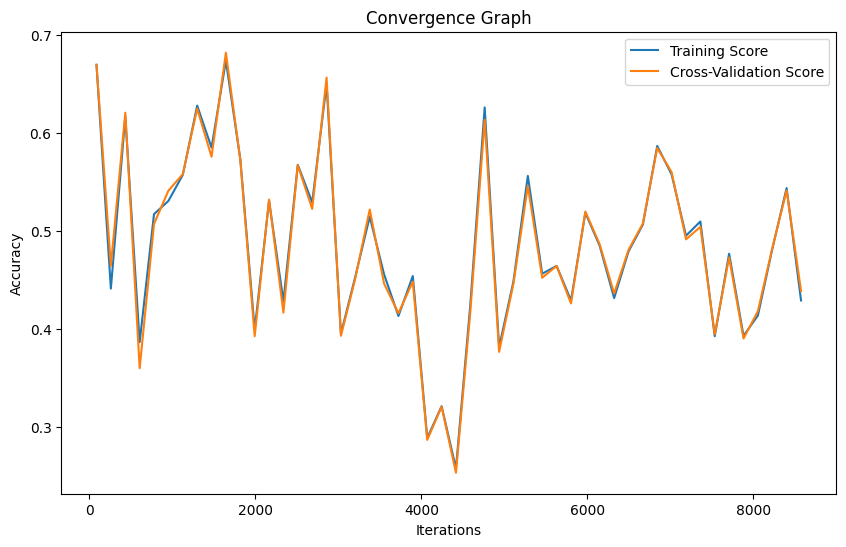

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()
     
